# **City of Pittsburgh Best Neighborhood**
---
As residents of Pittsburgh or while attending Pitt, one might begin to wonder which of the 90 neighborhoods is the 'best'. While the best neighborhood is likely subjective to an individual's personal preferences, we attempt to objectively determine Pittsburgh's "most fun" neighborhood through a series of analyses of 3 main metrics that we feel are most crucial in a 'fun' neighborhood: community/cultural development, crime rate, and environment/accessibility. Since this is where you might be moving to or living for a long time, you'll want to make sure it's worth your while.

## Community/cultural development: Public Art
---

**Link to datasets:** <br>
[Public Art](https://data.wprdc.org/dataset/city-of-pittsburgh-public-art) <br>
[Neighborhoods](https://data.wprdc.org/dataset/neighborhoods2)
<br>

In order to measure the community/cultural development of a neighborhood, public art was used as a determining factor. A neighborhood may be classified as "better" the more public art, and thus community involvement and spirit, it has. Since public art is for enjoyment and expression within the community, it creates a sense of belonging within the people, as well as bringing different cultures and expressions together. Usually, places where there are a lot of art are relatively developed and well off because it means a lot of people are comfortable expressing themselves, are inspired to create, and community relations are good.

### Public Art Analysis
---

To begin, I import pandas and access the relevant datasets. I start with art.csv to keep track of which neighborhoods had public art, and neighborhoods.csv to catalog every neighborhood in Pittsburgh.

In [3]:
import pandas as pd

# access data sets
art = pd.read_csv("art.csv")
neighborhoods = pd.read_csv("neighborhoods.csv")

In [3]:
# display art
art.head()

,_id,id,name,title,artist_name,art_type,park,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,812728309,1001,Oakwood Road Monument,NaN,NaN,NaN,NaN,Oakwood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-19,40.429192,-80.066225
1,2,188255168,1002,Rooster Waiting For The Streetcar,James Simon,Modern and Contemporary Art,NaN,NaN,Elliott,2.0,20.0,4.200356e+10,5.0,20.0,6.0,1-17,40.442926,-80.039711
2,3,2032091917,129,Middle East Memorial Plaque,NaN,War Memorials,NaN,NaN,Central Business District,6.0,1.0,4.200302e+10,6.0,1.0,2.0,1-4,40.438092,-79.996852
3,4,1447629273,143,L'Enfant,Paul Roger-Bloche,Historic Art,NaN,NaN,Carrick,4.0,29.0,4.200329e+10,3.0,29.0,3.0,4-23,40.388748,-79.986497
4,5,1935017944,148,Veterans Memorial (Brookline),NaN,War Memorials,Brookline Monument,NaN,Brookline,4.0,19.0,4.200319e+10,5.0,19.0,6.0,4-26,40.391721,-80.016981


In [4]:
# display neighborhoods
neighborhoods.head()

,_id,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,...,page_number,plannerassign,globalid,created_user,created_date,last_edited_user,last_edited_date,temp,shape_area,shape_length
0,2740,1,233,42,003,140500,3,420031405003,Block Group 3,G5030,...,15,Adriana Bowman,a642a6b6-a2a9-48d5-acf2-3e2ce87d4bc0,SDE,2020-08-14T12:57:28,SDE,2020-08-14T13:02:13,NaN,8.417066e+06,14181.728231
1,2741,2,203,42,003,140100,3,420031401003,Block Group 3,G5030,...,15,Christian Umbach,20d4605b-258e-441a-a57e-a28fdabb6d30,SDE,2020-08-14T12:57:28,SDE,2020-08-14T13:02:41,NaN,3.410838e+07,30326.729782
2,2742,3,86,42,003,101700,2,420031017002,Block Group 2,G5030,...,15,Keith Portugal,bf4065e7-c29c-48bd-b529-e7fd99077238,SDE,2020-08-14T12:57:28,SDE,2020-08-14T12:59:55,NaN,1.275115e+07,14577.426320
3,2743,4,214,42,003,050900,1,420030509001,Block Group 1,G5030,...,15,Ose Akinlotan,fed3fb32-0cd3-4556-aa41-17ee03b4fe41,SDE,2020-08-14T12:57:28,SDE,2020-08-14T12:58:41,NaN,4.897512e+06,13941.514212
4,2744,5,173,42,003,300100,5,420033001005,Block Group 5,G5030,...,15,Thomas Scharff,8669d2f0-b886-4519-99d0-bb1015b592b0,SDE,2020-08-14T12:57:28,SDE,2020-08-14T13:00:19,NaN,8.353056e+06,12021.864889


Since these datasets are content heavy, filter out the irrelevant information. What I want to focus on is mostly the qualitative information, particularly which neighborhood an art piece is located in. The title is included for identification, but does not contribute to the analysis. I also remove the few art pieces included that don't list the neighborhood.

In [4]:
# filter the rows
#artReduced = art[['title', 'art_type', 'neighborhood']]
artReduced = art[['title', 'neighborhood']]

# remove rows that don't have a neighborhood
artReduced.dropna(subset=['neighborhood'])

# display new art dataset
artReduced.head()

,title,neighborhood
0,Oakwood Road Monument,Oakwood
1,Rooster Waiting For The Streetcar,Elliott
2,Middle East Memorial Plaque,Central Business District
3,L'Enfant,Carrick
4,Veterans Memorial (Brookline),Brookline


Then, since I'm only concerned with the names of the neighborhoods, and each neighborhood in the dataset is unique, I created a list using the column with the names. Using that list, I created a dictionary so I could keep track of how much art appeared in each neighborhood. From that dictionary, I created a new dataframe with the neighborhoods as the index and the associated art quantities.

In [5]:
# create a list of all neighborhoods (names)
allHoods = neighborhoods.iloc[:, [21]]

# display list
allHoods.head()

,hood
0,Point Breeze North
1,Squirrel Hill North
2,Garfield
3,Bedford Dwellings
4,Knoxville


In [6]:
# create dictionary where key is neighborhood name and value is number of artworks
hoodDict = {}

# for each row, match the neighborhood name with a name in the dictionary and increment the associated value by 1
for index, row in art.iterrows():
    if (row['neighborhood']) in hoodDict:
        hoodDict[row['neighborhood']] = hoodDict[row['neighborhood']] + 1
    else:
        hoodDict[row['neighborhood']] = 1

# display dictionary
print(hoodDict)

{'Oakwood': 1, 'Elliott': 3, 'Central Business District': 27, 'Carrick': 2, 'Brookline': 2, 'South Side Slopes': 3, nan: 2, 'Hazelwood': 3, 'Highland Park': 10, 'Squirrel Hill South': 20, 'Perry North': 2, 'Beltzhoover': 3, 'Spring Hill-City View': 4, 'West End': 2, 'Greenfield': 3, 'Shadyside': 6, 'East Allegheny': 2, 'Squirrel Hill North': 2, 'Beechview': 7, 'Crawford-Roberts': 3, 'Lincoln-Lemington-Belmar': 2, 'Hays': 1, 'Allegheny Center': 18, 'North Oakland': 1, 'South Side Flats': 9, 'Central Oakland': 5, 'Point Breeze': 3, 'Allegheny West': 1, 'Strip District': 2, 'Mount Washington': 2, 'Brighton Heights': 5, 'Perry South': 1, 'North Shore': 8, 'Upper Hill': 2, 'Garfield': 2, 'Central Lawrenceville': 2, 'Upper Lawrenceville': 1, 'Stanton Heights': 1, 'Duquesne Heights': 3, 'Allentown': 2, 'East Liberty': 1, 'Bloomfield': 1, 'East Carnegie': 1, 'East Hills': 1, 'Lower Lawrenceville': 5, 'Overbrook': 1, 'Polish Hill': 1, 'Regent Square': 1, 'Sheraden': 1, 'Spring Garden': 2, 'Swis

In [7]:
# create the new dataframe and sort by descending art number
neighborhoodArt = pd.DataFrame(list(hoodDict.items()))
neighborhoodArt.columns = ['neighborhood', 'art']
neighborhoodArt = neighborhoodArt.sort_values(by = 'art', ascending = False, ignore_index = True)
neighborhoodArt.set_index('neighborhood', inplace = True, drop = True)

# display dataframe
neighborhoodArt.head()

,art
neighborhood,
Central Business District,27
Squirrel Hill South,20
Allegheny Center,18
Highland Park,10
South Side Flats,9


**Data Visualization**

---
Now that all the information needed for display has been generated, create a bar chart with said information.

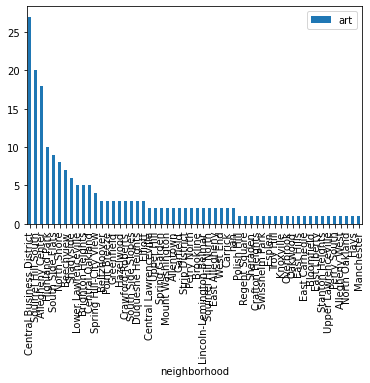

In [8]:
neighborhoodArt.plot(kind="bar")

Since it's very difficult to tell what's happening, let's look at just the top 15 neighborhoods and reformat it for better accessibility.

Text(0, 0.5, 'Instances of Public Art')

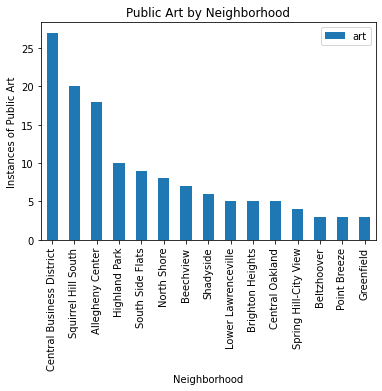

In [9]:
import matplotlib.pyplot as plt

artTop15 = neighborhoodArt.head(15)
artTop15.plot.bar(title="Public Art by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Instances of Public Art")

This chart now shows the top 15 neighborhoods, sorted by the instances of public art in descending order. From here, we see that 'Central Business District' has the most instances of art at 27 instances, 'Squirrel Hill South' is second at 20 instances, and 'Allegheny Center' follows in third at 18 instances of public art.

---
To see the density of artworks by neighborhood on a map, I follow the process outlined in the 'Data Visualization' lab.

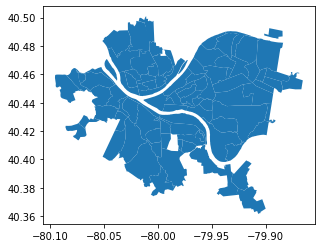

In [10]:
import geopandas

neighborhoodMap = geopandas.read_file("NeighborhoodMap/Neighborhoods_.shp") # read in the shapefile
neighborhoodMap.plot() # plot the geopandas dataframe

In [11]:
# merge
artMap = neighborhoodMap.merge(neighborhoodArt, how='left', left_on='hood', right_on='neighborhood')

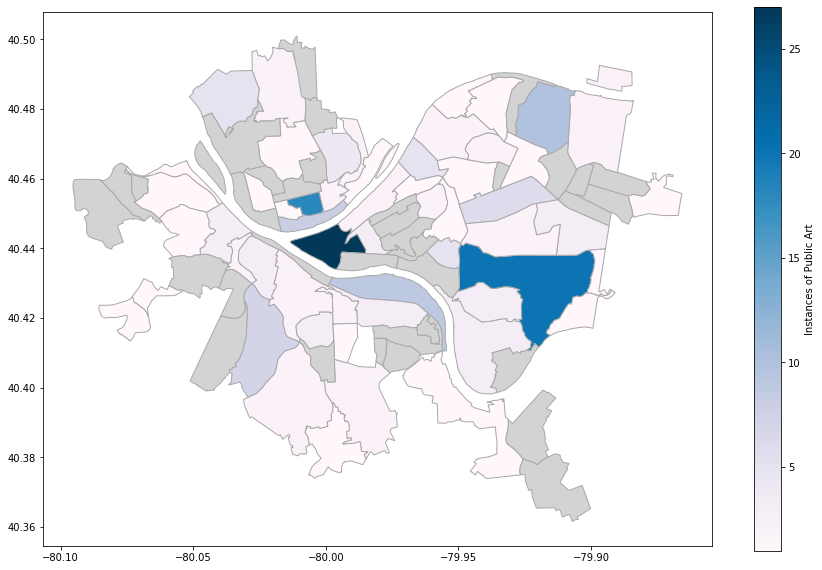

In [12]:
artMap.plot(column='art', # set the data to be used for coloring
            cmap='PuBu',              # choose a color palette
            edgecolor="darkgray",     # outline the districts in dark gray
            legend=True,              # show the legend
            legend_kwds={'label': "Instances of Public Art"}, # label the legend
            figsize=(15, 10),         # set the size
            missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
            )

### Public Art Conclusion
---
Based on just the metric of quantity of public art in a neighborhood, it appears Central Business District (downtown), Squirrel Hill South, and Allegheny Center are the best neighborhoods within the city of Pittsburgh. Though many neighborhoods had a few art pieces here and there, these 3 had the most significant values based on both the bar chart and as seen on the color map. Further analysis on other metrics should be completed to come to an overall conclusion, but these 3 neighborhoods are substantial contenders for best neighborhood in Pittsburgh. I feel this was relatively aligned with my personal idea of the best neighborhoods in Pittsburgh. I was initially surprised how much art was actually concentrated in Downtown (Central Business District), but after consideration, felt it made sense because a lot of business and exhibitions are conducted there. Squirrel Hill ranking in the top 3 was expected for me because I know it's a very involved community, but I wasn't familiar with Allegheny Center so I didn't have a previous opinion on it. Although I didn't know what to exepct at first, I think the data makes sense and creates a good picture for determining the most fun/best neighborhood.

## Safety: Crime
---

**Links to datasets:**  
https://data.wprdc.org/dataset/uniform-crime-reporting-data  
https://data.wprdc.org/dataset/pittsburgh-american-community-survey-2015-miscellaneous-data/resource/82f29015-6905-4b1c-8300-afe9bb2231b3  

To see which neighborhood has the best community, I decided to look at how lively a specific neighborhood is using the Police Blotter Archive. The amount of offenses in a given place typically correlates to how much is happening in the community. If someone living there feels on edge everytime they go out onto the street in their neighborhood, then they will be more alert and spirited.

### Crime Frequency Analysis
---

First, I import pandas and load in the crime data.

---

In [175]:
import pandas as pd

#Load crime data
crimeData = pd.read_csv("crime.tsv", index_col="_id", sep='\t')

#Display crime data
crimeData.head()

,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
_id,,,,,,,,,,,,,,,
1,2802309,16000001.0,10,2016-01-01T00:00:00,"400 Block North Shore DR Pittsburgh, PA 15212",Y,North Shore,1,HARRASSMENT/THREAT/ATTEMPT/PHY,2702 Aggravated Assault. / 2709(a) Harassment....,2205.0,1.0,6.0,-80.012337,40.446263
2,2803174,16004547.0,11,2016-01-01T00:01:00,"5400 Block Carnegie ST Pittsburgh, PA 15201",N,Upper Lawrenceville,2,THEFT BY DECEPTION,3922 Theft by Deception.,1011.0,7.0,2.0,-79.950295,40.482290
3,2801809,16000367.0,4,2016-01-01T00:10:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,DISCHARGE OF FIREARM INTO OCC.STRUCTURE,2707.1 Discharge of a Firearm into Occupied St...,2609.0,1.0,1.0,-80.000966,40.478651
4,2802315,16000035.0,10,2016-01-01T00:15:00,"300 Block Wood ST Pittsburgh, PA 15222",Y,Golden Triangle/Civic Arena,2,HARRASSMENT/THREAT/ATTEMPT/PHY,2709(a)(3) Harassment No Legitimate Purpose,201.0,6.0,6.0,-80.001251,40.438918
5,2802312,16000024.0,4,2016-01-01T00:16:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,PROP MISSILE INTO OCC VEHICLE/OR ROADWAY,2705 Recklessy Endangering Another Person. / 3...,2609.0,1.0,1.0,-80.000966,40.478651


---
This dataset has far too many columns, I only need the offense and the neighborhood where the crime took place. Also, I removed any rows with a null value for accuracy.

---

In [176]:
#Drop the irrelevant columns and rows with a null value
filtCrime = crimeData[['INCIDENTNEIGHBORHOOD', 'OFFENSES']]
filtCrime = filtCrime.dropna()

filtCrime.head()

,INCIDENTNEIGHBORHOOD,OFFENSES
_id,,
1,North Shore,2702 Aggravated Assault. / 2709(a) Harassment....
2,Upper Lawrenceville,3922 Theft by Deception.
3,Northview Heights,2707.1 Discharge of a Firearm into Occupied St...
4,Golden Triangle/Civic Arena,2709(a)(3) Harassment No Legitimate Purpose
5,Northview Heights,2705 Recklessy Endangering Another Person. / 3...


---
This is great, but I now I need to know exactly how many offenses occurred in each neighborhood

---

In [177]:
#Count each offense by neighborhood
crimeFreq = filtCrime.groupby("INCIDENTNEIGHBORHOOD").count()

#Display the offenses in each neighbood
crimeFreq

,OFFENSES
INCIDENTNEIGHBORHOOD,
Allegheny Center,3532
Allegheny West,1077
Allentown,5164
Arlington,2109
Arlington Heights,561
...,...
Upper Lawrenceville,1635
West End,1247
West Oakland,1920


**Population**

---
Now that we have the amount of crimes in each neighborhood, we need to make sure that neighborhoods with very little population aren't unfairly seen as calmer while neighborhoods with a large population are seen as hotspots. In order to do this, I loaded in a new dataset with the population of every neighborhood. With this data, I can compare the crime incidences to the population in order to get ratios that we can then compare to each other.

---

In [172]:
#Load population data
popData = pd.read_csv("population.tsv", index_col="_id", sep='\t')
popData = popData[['Neighborhood', 'Estimate; Total']]

#Display the dataset
popData

,Neighborhood,Estimate; Total
_id,,
1,Allegheny Center,1411.0
2,Allegheny West,343.0
3,Allentown,2558.0
4,Arlington,1852.0
5,Arlington Heights,272.0
...,...,...
87,Upper Lawrenceville,2754.0
88,West End,235.0
89,West Oakland,1717.0


---
Now we can merge the two dataframes into one, removing any neighborhoods that aren't in either table. The population dataset's neighborhoods will be used as the crime dataset has duplicates.

---

In [181]:
#Merge the two dataframes, use 
popCrime = pd.merge(popData, crimeFreq, left_on='Neighborhood', right_index=True)

#Display merged dataset
popCrime

,Neighborhood,Estimate; Total,OFFENSES
_id,,,
1,Allegheny Center,1411.0,3532
2,Allegheny West,343.0,1077
3,Allentown,2558.0,5164
4,Arlington,1852.0,2109
5,Arlington Heights,272.0,561
...,...,...,...
87,Upper Lawrenceville,2754.0,1635
88,West End,235.0,1247
89,West Oakland,1717.0,1920


---
Even with the ratio, we should still make sure that neighborhoods with very little people aren't counted. Let's remove any neighborhood with less than 500 people.

---

In [264]:
popCrime = popCrime[popCrime['Estimate; Total'] > 500]
popCrime

,Neighborhood,Estimate; Total,OFFENSES
_id,,,
1,Allegheny Center,1411.0,3532
3,Allentown,2558.0,5164
4,Arlington,1852.0,2109
6,Banksville,3858.0,1749
7,Bedford Dwellings,1349.0,2600
...,...,...,...
86,Upper Hill,1884.0,1908
87,Upper Lawrenceville,2754.0,1635
89,West Oakland,1717.0,1920


---
Now we can find the ratio by iterating through the dataframe, finding the ratio, and creating a new dictionary to store the values.

---

In [265]:
#Create an empty dictionary
crimeRatio = dict()

#Iterate through the dataframe
for index, row in popCrime.iterrows():
    #Assign a new entry named the current neighborhood, set it equal to population/offenses
    crimeRatio[row['Neighborhood']] = row['Estimate; Total'] / row['OFFENSES']
    
#Convert dictionary to dataframe
graphingRatio = pd.DataFrame([crimeRatio], index = ['Ratio']).T
graphingRatio

,Ratio
Allegheny Center,0.399490
Allentown,0.495352
Arlington,0.878141
Banksville,2.205832
Bedford Dwellings,0.518846
...,...
Upper Hill,0.987421
Upper Lawrenceville,1.684404
West Oakland,0.894271
Westwood,2.202366


---
I then graphed the data I had been working with so far in order to get a feel for how to display the final results.

---

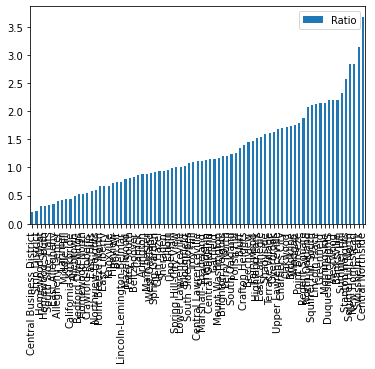

In [266]:
#Sort the values in ascending order and plot a bar graph
graphingRatio = graphingRatio.sort_values('Ratio', ascending=True)
graphingRatio.plot(kind='bar')

---
As you can see, this is very hard to read. Let's just take the top 10 neighborhoods with the most amount of crime incidences

---

Text(0, 0.5, 'Ratio')

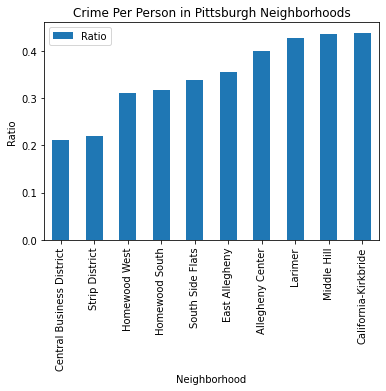

In [278]:
import matplotlib.pyplot as plt

#Crop to the best 10
bestCrime = graphingRatio.head(10)

#Plot the bar graph with labels
bestCrime.plot(kind='bar', title="Crime Per Person in Pittsburgh Neighborhoods")
plt.xlabel("Neighborhood")
plt.ylabel("Ratio")

### Crime Frequency Conclusion
---
So, according to this, the top three neighborhoods in Pittsburgh to live in terms of the crime per person are the Central Business District, Strip District, and Homewood West. If one chooses to live here, the town will feel more like a living, breathing organism than a sterile community.

---

## Environment/Accessibility: Parks
---

### Links to Datasets:
1. [Parks Dataset](https://data.wprdc.org/dataset/parks1/resource/bb57d0a7-e8ee-4218-8906-0dedc903038c?inner_span=True)
2. [Neighborhoods Dataset](https://data.wprdc.org/dataset/neighborhoods2)

### Metric: Environment and Accessibility

Neighborhoods with parks enjoy a myriad of benefits that significantly enhance residents' quality of life. Parks serve as communal hubs, fostering social connections and a sense of community, while also providing spaces for physical activities that promote both physical and mental well-being.

### Parks Analysis

---
First we see what neighborhood has the most amount of parks. The more Parks means the more accessibility for the community making it a better place ultimatley giving it a better chance of being the top neighborhood. The less parks the worse neighborhood in this case. We will take the top 10 for parks and see which neighborhood has the most parks. first we need to import files.

In [7]:
import pandas as pd
parks_df = pd.read_csv('Parks.csv')
neighborhood_df = pd.read_csv('neighborhoods.csv')

Next we need to find the top 10 neighborhoods with the most parks. There is a lot of parks with neighborhoods, but we need to seperate them and find the top 10. Also we have to specify the type to park because there is some that aren't considered a park specifically.

In [8]:
# Filter rows type is Park
parks_df = parks_df[parks_df['type'] == 'Park']

# Group by count the number of parks 
neighborhood_park_counts = parks_df['neighborhood'].value_counts()

# Find the top 10
top_10_neighborhoods = neighborhood_park_counts.head(10).index

# DataFrame maximum number of parks in each neighborhood
top_10_parks_df = pd.DataFrame({'neighborhood': top_10_neighborhoods, 'max_parks': neighborhood_park_counts[top_10_neighborhoods]})
top_10_parks_df = top_10_parks_df.sample(frac=1).reset_index(drop=True)

result_df = pd.merge(parks_df, top_10_parks_df, on='neighborhood')
result_df

,_id,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude,max_parks
0,1,2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,4-28,40.408118,-80.028197,6
1,8,1829922263,Alton Park,Park,Parks - Southern,NaN,Beechview,4,19,42003191600,5,19,6,4-28,40.414580,-80.021855,6
2,23,1990832198,Beechview Healthy Active Living Center Park,Park,Parks - Southern,NaN,Beechview,4,19,42003191600,5,19,6,4-28,40.410721,-80.024362,6
3,151,1572177418,Pauline Park,Park,Parks - Southern,NaN,Beechview,4,19,42003192000,5,19,6,4-28,40.404576,-80.025946,6
4,182,1504989458,Tropical Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003191600,5,19,6,4-28,40.422261,-80.023991,6
5,186,1952724428,Vanucci Park,Park,Parks - Southern,NaN,Beechview,4,19,42003191600,5,19,6,4-28,40.414811,-80.017843,6
6,11,1928748922,Arlington Park,Park,Parks - Southern,NaN,South Side Slopes,3,16,42003160800,3,16,3,4-22,40.418283,-79.975050,6
7,37,712782057,Cobden Street Park,Park,Parks - Southern,NaN,South Side Slopes,3,16,42003160800,3,16,3,4-22,40.419338,-79.968198,6
8,55,303472511,Eleanor Street Park,Park,Parks - Southern,NaN,South Side Slopes,3,16,42003160800,3,16,3,4-22,40.421408,-79.972879,6
9,132,375307767,Monongahela Park,Park,Parks - Southern,NaN,South Side Slopes,3,16,42003160800,3,16,3,4-22,40.421699,-79.966333,6


Now there is a lot more data then we need. So we need to take specific columns to get the display we want with the neighborhood, total number of parks, and latitude and longitude.

In [11]:
# Group number of parks in each neighborhood
neighborhood_park_counts = parks_df['neighborhood'].value_counts()

# Most parks data
top_10_neighborhoods = neighborhood_park_counts.head(10).index

# Maximum number of parks in each neighborhood
top_10_parks_df = pd.DataFrame({'neighborhood': top_10_neighborhoods, 'max_parks': neighborhood_park_counts[top_10_neighborhoods]})

# Descending order
top_10_parks_df = top_10_parks_df.sort_values(by='max_parks', ascending=False).reset_index(drop=True)

neighborhood_coords = parks_df.groupby('neighborhood')[['longitude', 'latitude']].first()

# Merge 
top_10_parks_df = pd.merge(top_10_parks_df, neighborhood_coords, left_on='neighborhood', right_index=True)
top_10_parks_df.head(10)

,neighborhood,max_parks,longitude,latitude
0,Beechview,6,-80.028197,40.408118
1,South Side Slopes,6,-79.975050,40.418283
2,Troy Hill,5,-79.988924,40.458690
3,Hazelwood,5,-79.945672,40.403974
4,Mount Washington,5,-80.008521,40.432901
5,Elliott,4,-80.043455,40.439462
6,Sheraden,4,-80.066199,40.459298
7,Marshall-Shadeland,4,-80.030594,40.462518
8,East Liberty,4,-79.918745,40.462065
9,Brighton Heights,3,-80.029606,40.485600


Next we will display all the neighborhoods that don't have parks. These neighborhoods will be at a set back when finding the top neighborhoods in Pittsburgh. We need to seperate the neighborhoods in the park file with the hood in the neighborhood file to find the ones that don't have parks.

In [15]:
# Merge
merged_df = pd.merge(neighborhood_df, parks_df, left_on='hood', right_on='neighborhood', how='left')

# Has a park or not
merged_df['has_park'] = merged_df['name'].notnull()

# Separate sets
neighborhoods_with_parks = merged_df[merged_df['has_park'] == True]
neighborhoods_without_parks = merged_df[merged_df['has_park'] == False]

print("Neighborhoods without Parks:")
print(neighborhoods_without_parks[['hood']])

Neighborhoods without Parks:
                     hood
8               Knoxville
15             Glen Hazel
36      Northview Heights
39      Arlington Heights
68         Allegheny West
86              Overbrook
87             Friendship
99         East Allegheny
118        Chartiers City
160             Ridgemont
166           South Shore
167            Mt. Oliver
168  California-Kirkbride
187             St. Clair
188               Chateau
189             Shadyside
190           Summer Hill


Next we will make a bar chart to display the data clearly in a different way. We'll make the chart go from left to right so the top neighborhood Beechview to the 10th being Brighton Heights.

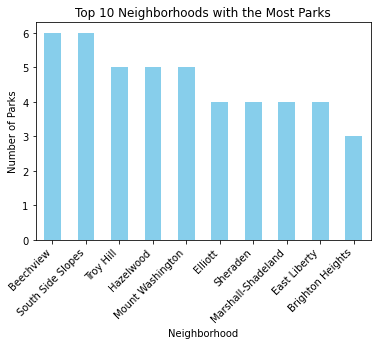

In [17]:
import matplotlib.pyplot as plt

parks_df = parks_df[parks_df['type'] == 'Park']

# Group by number of parks in each neighborhood
neighborhood_park_counts = parks_df['neighborhood'].value_counts()
top_10_neighborhoods = neighborhood_park_counts.head(10)

top_10_neighborhoods.plot(kind='bar', color='skyblue')
plt.title('Top 10 Neighborhoods with the Most Parks')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Parks')
plt.xticks(rotation=45, ha='right')
plt.show()

Next we will import the map of the neighborhoods of the city of Pittsburgh.

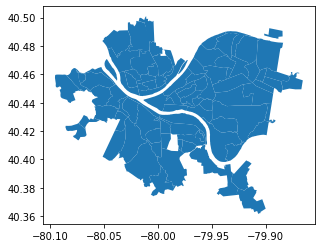

In [19]:
import geopandas as gpd

# Load GeoDataFrame 
neighborhood_map = gpd.read_file("NeighborhoodMap/Neighborhoods_.shp")
neighborhood_map.plot()

Last we will make a map to display where the top neighborhoods are at on the map. The darkest red will display the top neighborhoods the lighter the color the less parks they will have. We can also use the data to see if the neighborhoods are close to each other to see if the commutities are closely correlated. 

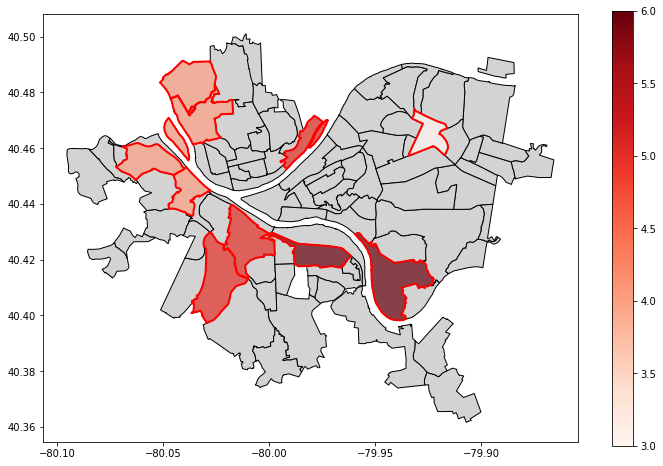

In [20]:
# The top 10 neighborhoods and their coordinates
top_10_neighborhoods = ['Beechview', 'South Side Slopes', 'Troy Hill', 'Hazelwood',
                         'Mount Washington', 'Elliott', 'Sheraden', 'Marshall-Shadeland',
                         'East Liberty', 'Brighton Heights']

top_10_parks = [6, 6, 5, 5, 5, 4, 4, 4, 4, 3]  # Number of parks for each neighborhood

top_10_coords = neighborhoodMap[neighborhoodMap['hood'].isin(top_10_neighborhoods)].copy()
top_10_coords['max_parks'] = top_10_parks

fig, ax = plt.subplots(figsize=(12, 8))
neighborhoodMap.plot(ax=ax, color='lightgrey', edgecolor='black')

top_10_coords.boundary.plot(ax=ax, color=None, edgecolor='red', linewidth=2, marker='o', markersize=50)
top_10_coords.plot(ax=ax, column='max_parks', cmap='Reds', linewidth=0, alpha=0.7, legend=True)

# Display plot
plt.show()


### Parks Conclusion
---

Based on just the metric of envirement/accessability of parks in a neighborhood, we can see two top contenders. Beechview and South Side Slopes both have 6 total parks each making it the best neighborhoods in this data set. With the data set we were looking for the most parks in quantity. Having one more park then your opposing neighborhood could have a big impact on your competition as we can see here. To figure out which one is better more data sets would have to be involved to determine the winner. These two neighborhoods have to be included in the question of which neighborhood is the best in the city of Pittsburgh. 


# **Final Conclusion**
---
After the analysis conducted on all of Pittsburgh's 90 neighborhoods in order to deduce which one would be the most fun and thrilling to live in (and therefore the best), Central Business District (or Downtown Pittsburgh as it's more commonly known as) is the most exciting neighborhood to live in, with the largest number of art pieces on display and the most crime calculated . Unfortunately, the neighborhoods with the highest number of parks did not overlap with any other contenders from the other two metrics, however we feel that given how well Central Business District performs in those other two metrics, it is fair to name it the "best" neighborhood in Pittsburgh. While the majority of us did not have initial thoughts on which neighborhood would be the best, we felt that Downtown being selected the most thrilling (best) neighborhood wasn't entirely unsurprising since with all the businesses, events, performances, showcases, crimes etc. going on in Downtown all the time, one will never be short on entertainment and will always truly appreciate the value of life.